In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [ ]:
#Loading the drug200 data
data = 'drug200.csv'

df = pd.read_csv(data)

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df.shape

(200, 6)

In [ ]:
print('Classes to predict: ', df.Drug)

Classes to predict:  0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object


In [ ]:
print('Features: ', df.BP)

Features:  0        HIGH
1         LOW
2         LOW
3      NORMAL
4         LOW
        ...  
195       LOW
196       LOW
197    NORMAL
198    NORMAL
199       LOW
Name: BP, Length: 200, dtype: object


In [ ]:
#First four rows from the dataset.
df[:4]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX


In [ ]:
df[:4]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX


In [ ]:
y= np.array(y_int, dtype='float64')
# Extracting data attributes / features
X = df.drop(['Drug'], axis=1) # drug خد جميع الداتا ما عدا

# Extracting target/ class labels
y = df.Drug

NameError: ignored

In [ ]:
df['Sex']=df['Sex'].map({'F':1, 'M':2})

In [ ]:
df['BP']=df['BP'].map({'LOW':0,'NORMAL':1, 'HIGH':2})


In [ ]:
df['Cholesterol']=df['Cholesterol'].map({'NORMAL':0, 'HIGH':1})

In [ ]:
df['Drug']=df['Drug'].map({'drugY':5, 'drugC':3, 'drugX':4, 'drugA':1, 'drugB':2})

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,5
1,47,2,0,1,13.093,3
2,47,2,0,1,10.114,3
3,28,1,1,1,7.798,4
4,61,1,0,1,18.043,5


In [ ]:
#Shape of the dataset
display(X.shape, y.shape)

(200, 5)

(200,)

In [ ]:
df.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug             int64
dtype: object

In [ ]:
X = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
y = df['Drug'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)




```
# Scalling
```

# New Section

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



```
# This is formatted as code
```

# Finding best max depth value

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
for depth in [1,2,3,4,5,6,7,8,9,10]:
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_train, y_train)
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train))
  dt = DecisionTreeClassifier(max_depth=depth)
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7071428571428572  Cross val score :  0.7071428571428572
Depth  :  2  Training Accuracy :  0.8357142857142857  Cross val score :  0.8357142857142856
Depth  :  3  Training Accuracy :  0.9428571428571428  Cross val score :  0.9357142857142857
Depth  :  4  Training Accuracy :  1.0  Cross val score :  0.9928571428571429
Depth  :  5  Training Accuracy :  1.0  Cross val score :  0.9928571428571429
Depth  :  6  Training Accuracy :  1.0  Cross val score :  0.9928571428571429
Depth  :  7  Training Accuracy :  1.0  Cross val score :  0.9928571428571429
Depth  :  8  Training Accuracy :  1.0  Cross val score :  0.9928571428571429
Depth  :  9  Training Accuracy :  1.0  Cross val score :  0.9928571428571429
Depth  :  10  Training Accuracy :  1.0  Cross val score :  0.9928571428571429


# max depth 4 has high cross val score.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)
importance = dt.feature_importances_
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred

array([5, 4, 5, 2, 5, 5, 1, 4, 3, 4, 4, 5, 5, 4, 5, 5, 3, 3, 5, 4, 4, 1,
       5, 1, 5, 5, 5, 4, 4, 2, 5, 2, 4, 5, 5, 4, 2, 5, 4, 4, 5, 5, 4, 5,
       5, 1, 3, 5, 5, 4, 4, 2, 4, 5, 5, 5, 4, 5, 4, 1])

# Feature Importance

In [ ]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.13964
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.29530
Feature: 3, Score: 0.09817
Feature: 4, Score: 0.46688


# Na_to_K have high Feature Importance.

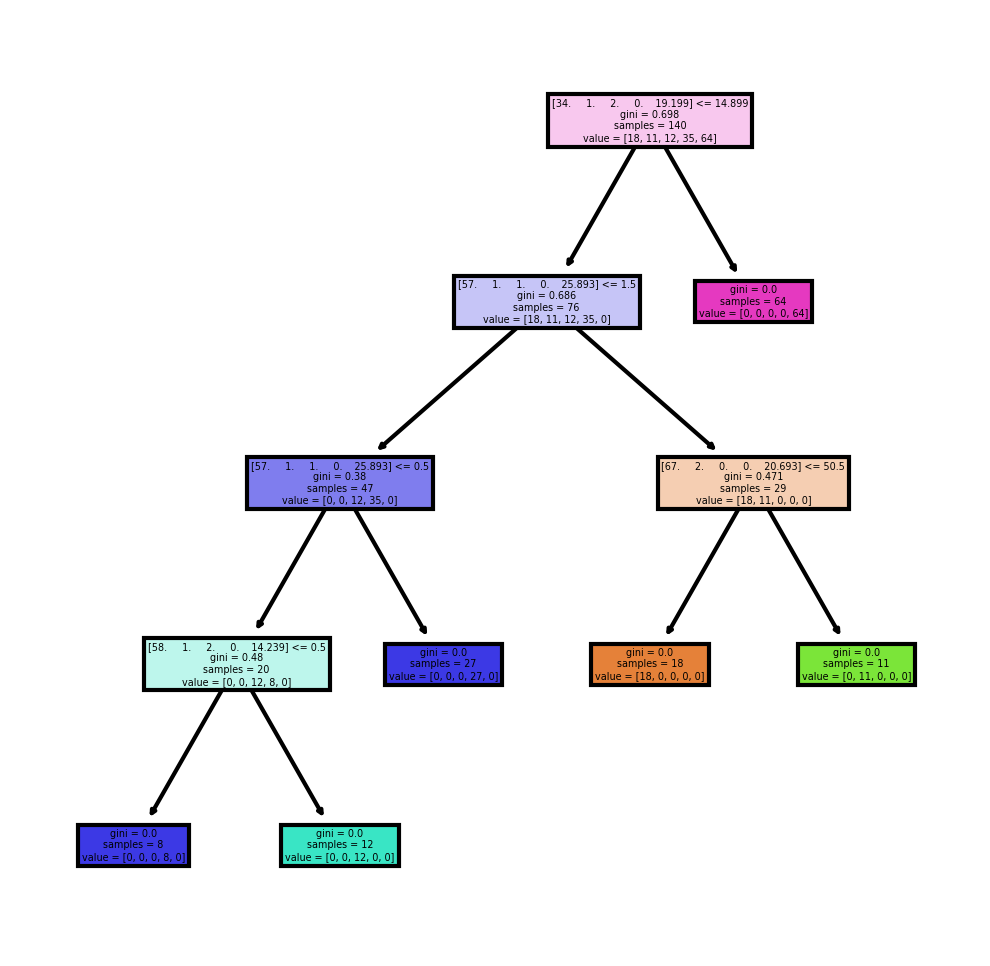

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = X_test,
               filled = True);
fig.savefig('imagename.png')

In [ ]:
# Import library for splitting the dataset into train and test.
from sklearn.model_selection import train_test_split

In [ ]:
#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, test_size = 0.25)

In [ ]:
#Importing the Decision tree classifier from the sklearn library.
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
#prediction
y_pred = clf.predict(X_test)

In [ ]:
# check for missing values in variables

df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

# 2- 100% accuracy Decision Trees Classifier.ipynb



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#Loading the drug200 data
data = 'drug200.csv'

df = pd.read_csv(data)

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# Pre Processing

# Splitting the data

In [ ]:
a = df.iloc[:, [1,2,3,5]]  # تحتوي علي هذه الارقامaاي ان
b = df.iloc[:,[0, 4]] # تحتوي علي هذه الارقامbاي ان
b

,Age,Na_to_K
0,23,25.355
1,47,13.093
2,47,10.114
3,28,7.798
4,61,18.043
...,...,...
195,56,11.567
196,16,12.006
197,52,9.894
198,23,14.020


# Encoding

In [ ]:
a_enc = a.copy()
for col in a.columns:
    lb = LabelEncoder()
    a_enc[col] = lb.fit_transform(a[col].values)
a_enc

,Sex,BP,Cholesterol,Drug
0,0,0,0,4
1,1,1,0,2
2,1,1,0,2
3,0,2,0,3
4,0,1,0,4
...,...,...,...,...
195,0,1,0,2
196,1,1,0,2
197,1,2,0,3
198,1,2,1,3


# Concatenating the data back

In [ ]:
data1 = pd.concat([b, a_enc], axis = 1)

# Evaluating the data

In [ ]:
data1.describe()

,Age,Na_to_K,Sex,BP,Cholesterol,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,16.084485,0.520000,0.910000,0.485000,2.870000
std,16.544315,7.223956,0.500854,0.821752,0.501029,1.372047
min,15.000000,6.269000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,10.445500,0.000000,0.000000,0.000000,2.000000
50%,45.000000,13.936500,1.000000,1.000000,0.000000,3.000000
75%,58.000000,19.380000,1.000000,2.000000,1.000000,4.000000
max,74.000000,38.247000,1.000000,2.000000,1.000000,4.000000


# Visualizing the target classes

In [ ]:
data1['Drug'].unique()

array([4, 2, 3, 0, 1])

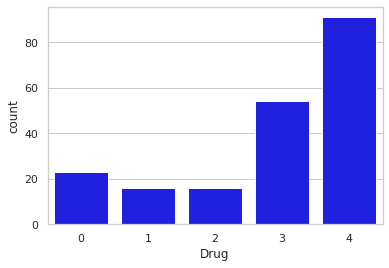

In [ ]:
sns.countplot(x = data1['Drug'], color= 'blue')

# Splitting into features and target

In [ ]:
X = data1.drop('Drug', axis = 1)
y = data1['Drug']

# Function for Model Evaluation

In [ ]:
def model_evaluation(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(5,5)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')

# Model building for Decision Tree

In [ ]:
clf = DecisionTreeClassifier()

# Using Cross Validation to find parameters for highest accuracy

In [ ]:
param_dist = {'max_depth': [None, 2, 3, 4, 5, 6],
             'criterion': ['gini', 'entropy'],
             'min_samples_split': [5, 10, 12],
             'max_leaf_nodes': [10, 15, 20, None]}

In [ ]:
rcv = RandomizedSearchCV(clf, param_distributions = param_dist, n_iter = 10, cv = 5)
rcv.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 3, 4, 5, 6],
                                        'max_leaf_nodes': [10, 15, 20, None],
                                        'min_samples_split': [5, 10, 12]})

In [ ]:
rcv.best_score_

0.985

In [ ]:
rcv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=20,
                       min_samples_split=10)

In [ ]:
rcv.best_params_

{'min_samples_split': 10,
 'max_leaf_nodes': 20,
 'max_depth': 4,
 'criterion': 'entropy'}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Building the best fitting Decision tree model

In [ ]:
dt = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 15, min_samples_split = 12).fit(X_train, y_train)

In [ ]:
dt.score(X_train, y_train), dt.score(X_test, y_test)

(1.0, 1.0)

# Evaluation of our model.

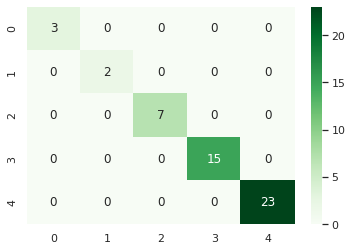

In [ ]:
model_evaluation(dt)

# Checking for null values

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Na_to_K      200 non-null    float64
 2   Sex          200 non-null    int64  
 3   BP           200 non-null    int64  
 4   Cholesterol  200 non-null    int64  
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [ ]:
data1.duplicated().sum()

0

#3- 100% Accuracy- Drug Classification

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# 1. Imports

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import linear_model, naive_bayes, neighbors, svm

In [ ]:
#Loading the drug200 data
data = 'drug200.csv'

df = pd.read_csv(data)

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


# 2.Grouping data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


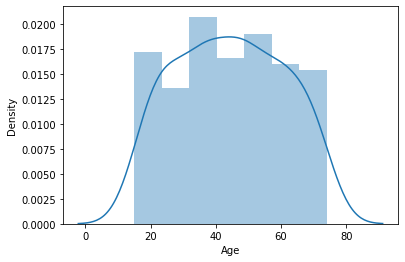

In [ ]:
sns.distplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


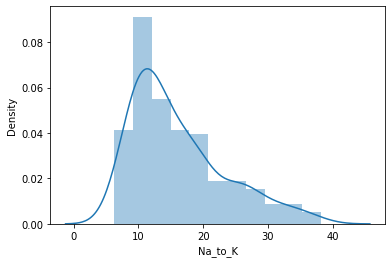

In [ ]:
sns.distplot(df['Na_to_K'])

In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
age_groups = []
for i in df['Age']:
    if i <= 30:
        age_groups.append('0-30')
    if i > 30 and i <= 40:
        age_groups.append('30-40')
    if i > 40 and i <= 50:
        age_groups.append('40-50')
    if i > 50 and i <= 60:
        age_groups.append('50-60')
    if i > 60:
        age_groups.append('60+')

df['AgeGroup'] = age_groups

In [ ]:
na_to_k_groups = []
for i in df["Na_to_K"]:
    if i <= 10:
        na_to_k_groups.append('5-10')
    if i > 10 and i <= 15:
        na_to_k_groups.append('10-15')
    if i > 15 and i <= 20:
        na_to_k_groups.append('15-20')
    if i > 20 and i <= 25:
        na_to_k_groups.append('20-25')
    if i > 25 and i <= 30:
        na_to_k_groups.append('25-30')
    if i > 30:
        na_to_k_groups.append('30+')

df['Na_to_K_groups'] = na_to_k_groups

In [ ]:
df = df[['AgeGroup','Sex','BP','Cholesterol','Na_to_K_groups','Drug']]
df.head()

,AgeGroup,Sex,BP,Cholesterol,Na_to_K_groups,Drug
0,0-30,F,HIGH,HIGH,25-30,drugY
1,40-50,M,LOW,HIGH,10-15,drugC
2,40-50,M,LOW,HIGH,10-15,drugC
3,0-30,F,NORMAL,HIGH,5-10,drugX
4,60+,F,LOW,HIGH,15-20,drugY


# 3.Visualising tha variable distributions

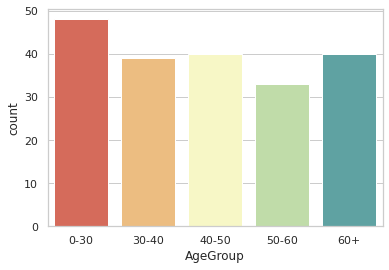

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(x="AgeGroup", data=df, palette='Spectral', order=['0-30', '30-40', '40-50', '50-60', '60+'])

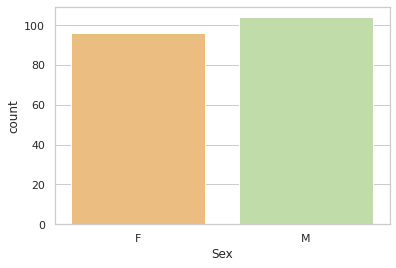

In [ ]:
sns.countplot(x='Sex', data = df, palette='Spectral')

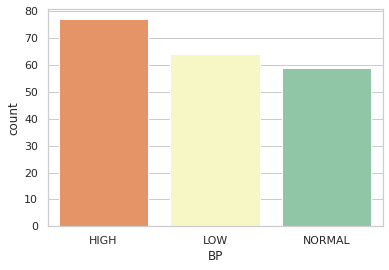

In [ ]:
sns.countplot(x="BP", data=df, palette='Spectral')

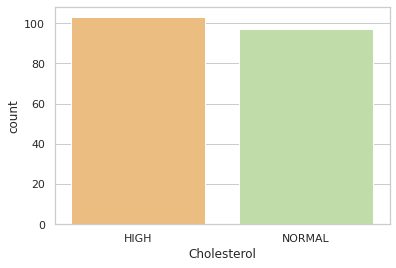

In [ ]:
sns.countplot(x="Cholesterol", data=df, palette='Spectral')

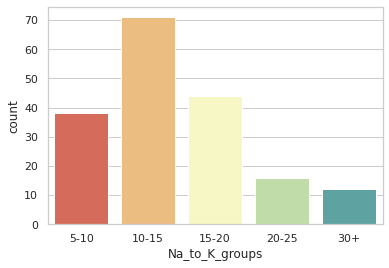

In [ ]:
sns.countplot(x='Na_to_K_groups', data=df, palette='Spectral', order = ['5-10','10-15','15-20','20-25','30+'])

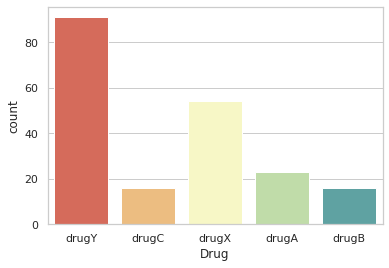

In [ ]:
sns.countplot(x="Drug", data=df, palette='Spectral')

In [ ]:
x, y = df.values[:, :-1], df.values[:, -1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33)

In [ ]:
x_train = pd.get_dummies(pd.DataFrame(x_train))
x_test = pd.get_dummies(pd.DataFrame(x_test))

In [ ]:
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

[Text(0.5, 0, 'Drug')]

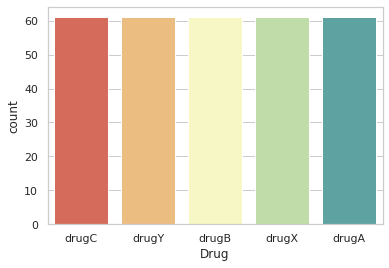

In [ ]:
ax = sns.countplot(x=y_train, data=df, palette='Spectral')
ax.set(xlabel='Drug')

In [ ]:
print("ORIGINAL dataset:", len(df), "\n EXTENDED dataset:", len(y))

ORIGINAL dataset: 200 
 EXTENDED dataset: 200


# 4. Logistic Regression

In [ ]:
log_reg = linear_model.LogisticRegression(max_iter = 5000)
log_reg.fit(x_train, y_train)
log_reg_acc = 100*log_reg.score(x_test, y_test)
print('Logistic Regression Predictions: \n', log_reg.predict(x_test), '\n Accuracy:', log_reg_acc, '%')

Logistic Regression Predictions: 
 ['drugB' 'drugA' 'drugX' 'drugX' 'drugA' 'drugY' 'drugA' 'drugY' 'drugB'
 'drugY' 'drugY' 'drugX' 'drugX' 'drugY' 'drugX' 'drugY' 'drugA' 'drugX'
 'drugX' 'drugY' 'drugA' 'drugA' 'drugB' 'drugY' 'drugX' 'drugY' 'drugX'
 'drugY' 'drugX' 'drugX' 'drugB' 'drugB' 'drugY' 'drugY' 'drugY' 'drugY'
 'drugX' 'drugB' 'drugY' 'drugB' 'drugX' 'drugA' 'drugY' 'drugY' 'drugY'
 'drugY' 'drugB' 'drugC' 'drugY' 'drugC' 'drugA' 'drugY' 'drugY' 'drugB'
 'drugY' 'drugX' 'drugY' 'drugY' 'drugY' 'drugX' 'drugX' 'drugY' 'drugY'
 'drugY' 'drugB' 'drugY'] 
 Accuracy: 100.0 %


# 5. Gaussian Naive Bayes

In [ ]:
nb = naive_bayes.GaussianNB()
nb.fit(x_train, y_train)
nb_acc = 100*nb.score(x_test, y_test)
print('Naive Bayes Predictions: \n', nb.predict(x_test), '\n Accuracy:', nb_acc, '%')

Naive Bayes Predictions: 
 ['drugB' 'drugA' 'drugX' 'drugX' 'drugA' 'drugY' 'drugA' 'drugY' 'drugB'
 'drugY' 'drugY' 'drugX' 'drugX' 'drugY' 'drugX' 'drugY' 'drugA' 'drugX'
 'drugX' 'drugY' 'drugA' 'drugA' 'drugB' 'drugY' 'drugX' 'drugY' 'drugX'
 'drugY' 'drugX' 'drugX' 'drugB' 'drugB' 'drugY' 'drugY' 'drugY' 'drugY'
 'drugX' 'drugB' 'drugY' 'drugB' 'drugX' 'drugA' 'drugY' 'drugY' 'drugY'
 'drugY' 'drugB' 'drugX' 'drugY' 'drugC' 'drugA' 'drugY' 'drugY' 'drugB'
 'drugY' 'drugX' 'drugY' 'drugY' 'drugY' 'drugX' 'drugX' 'drugY' 'drugY'
 'drugY' 'drugB' 'drugY'] 
 Accuracy: 98.48484848484848 %


# 6. K-Nearest Neighbours

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)
knn_acc = 100*knn.score(x_test, y_test)
print('K-Nearest Neighbours Predictions: \n', knn.predict(x_test), '\n Accuracy:', knn_acc, '%')

K-Nearest Neighbours Predictions: 
 ['drugY' 'drugA' 'drugX' 'drugX' 'drugY' 'drugY' 'drugX' 'drugX' 'drugA'
 'drugX' 'drugC' 'drugX' 'drugX' 'drugY' 'drugX' 'drugY' 'drugX' 'drugX'
 'drugX' 'drugA' 'drugA' 'drugA' 'drugA' 'drugY' 'drugX' 'drugY' 'drugX'
 'drugY' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY' 'drugY' 'drugY' 'drugC'
 'drugX' 'drugY' 'drugX' 'drugY' 'drugX' 'drugA' 'drugC' 'drugY' 'drugY'
 'drugX' 'drugA' 'drugX' 'drugY' 'drugC' 'drugA' 'drugY' 'drugY' 'drugA'
 'drugY' 'drugX' 'drugY' 'drugY' 'drugY' 'drugX' 'drugX' 'drugY' 'drugX'
 'drugX' 'drugX' 'drugY'] 
 Accuracy: 63.63636363636363 %


#7. Support Vector Machine

In [ ]:
svm =svm.SVC(kernel='linear')
svm.fit(x_train, y_train)
svm_acc = 100*svm.score(x_test, y_test)
print('SVM Predictions: \n', svm.predict(x_test), '\n Accuracy:', svm_acc, '%')

SVM Predictions: 
 ['drugB' 'drugA' 'drugX' 'drugX' 'drugA' 'drugY' 'drugA' 'drugY' 'drugB'
 'drugY' 'drugY' 'drugX' 'drugX' 'drugY' 'drugX' 'drugY' 'drugA' 'drugX'
 'drugX' 'drugY' 'drugA' 'drugA' 'drugB' 'drugY' 'drugX' 'drugY' 'drugX'
 'drugY' 'drugX' 'drugX' 'drugB' 'drugB' 'drugY' 'drugY' 'drugY' 'drugY'
 'drugX' 'drugB' 'drugY' 'drugB' 'drugX' 'drugA' 'drugY' 'drugY' 'drugY'
 'drugY' 'drugB' 'drugC' 'drugY' 'drugC' 'drugA' 'drugY' 'drugY' 'drugB'
 'drugY' 'drugX' 'drugY' 'drugY' 'drugY' 'drugX' 'drugX' 'drugY' 'drugY'
 'drugY' 'drugB' 'drugY'] 
 Accuracy: 100.0 %


# 8. Summary

In [ ]:
pd.DataFrame(data={'Model': ['Logistic Regression','Gaussian Naive Bayes', 'K_Nearest Neighbours', 'Support Vector Machine(SVM)'], 'Accuracy %':[log_reg_acc, nb_acc, knn_acc, svm_acc]})

,Model,Accuracy %
0,Logistic Regression,100.000000
1,Gaussian Naive Bayes,98.484848
2,K_Nearest Neighbours,63.636364
3,Support Vector Machine(SVM),100.000000
